In [37]:
import numpy as np
import matplotlib.pyplot as plt

### Basic NumPy Arrays

In [38]:
stock_list = [3.5, 5, 2, 8, 4.2]

In [39]:
returns = np.array(stock_list)
print(returns), type(returns)

[3.5 5.  2.  8.  4.2]


(None, numpy.ndarray)

ndarray because NumPy let's you create a multi dimensional array in case you, for example, pass to np.array a list of list.

In [40]:
A = np.array([[1, 2], [3, 4]])
print(A), type(A)

[[1 2]
 [3 4]]


(None, numpy.ndarray)

In [41]:
print(A.shape)

(2, 2)


In [42]:
print(returns[0], returns[len(returns) - 1])

3.5 4.2


In [43]:
print(returns[1:3])

[5. 2.]


In [44]:
print(A[:, 0])

[1 3]


In [45]:
print(A[0, :])

[1 2]


In [46]:
print(type(A[0, :]))

<class 'numpy.ndarray'>


In [47]:
print(A[0])

[1 2]


In [48]:
print(A[1, 1])

4


### Array functions

In [49]:
np.log(returns)

array([1.25276297, 1.60943791, 0.69314718, 2.07944154, 1.43508453])

In [50]:
print(np.mean(returns))

4.54


In [51]:
print(max(returns))

8.0


In [52]:
# Return to the returns
returns * 2 + 5

array([12. , 15. ,  9. , 21. , 13.4])

In [53]:
print("Mean:", np.mean(returns), "Std Dev:", np.std(returns))

Mean: 4.54 Std Dev: 1.9915822855207364


In [54]:
N = 10
assets = np.zeros((N, 100))
returns = np.zeros((N, 100))

In [55]:
# The random module is very useful. It contains methods for sampling from many different probability distributions. 
# In this case we draw N = 100 random samples from a normal distribution with mean 1.01 and standard deviation 0.03. 
# We treat these as the daily percentage returns of our assets and take the cumulative product to get the current price.
R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)

In [56]:
# Generate assets that are correlated with R_1
for i in range(1, N):
    R_i = R_1 + np.random.normal(0.001, 0.02, 100)
    returns[i] = R_i # Set each row of returns equal to the new R_i array
    assets[i] = np.cumprod(R_i)

mean_returns = [(np.mean(R) - 1) * 100 for R in returns]
return_volatilities = [np.std(R) for R in returns]

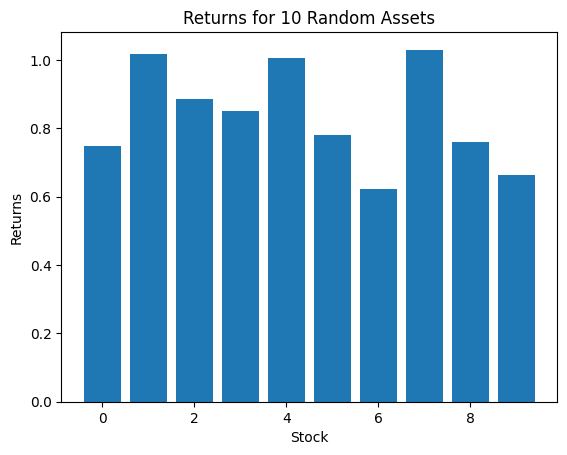

In [57]:
plt.bar(np.arange(len(mean_returns)), mean_returns)
plt.xlabel('Stock')
plt.ylabel('Returns')
plt.title('Returns for {0} Random Assets'.format(N));

### Calculating Excepted Return 

In [58]:
# Generate N random weights for each asset in the portfolio
weights = np.random.uniform(0, 1, N)
weights = weights/np.sum(weights)

In [59]:
# To calculate the mean return of the portfolio, we have to scale each asset's return by its designated weight.
p_returns = np.dot(mean_returns, weights)
print("Expected return of the portfolio:", p_returns)


Expected return of the portfolio: 0.869065409809809


Beware of NaN values

In [60]:
v = np.array([1, 2, np.nan, 4, 5])
print(v)

[ 1.  2. nan  4.  5.]


In [61]:
# What happens when we try to take the mean of this array?
print(np.mean(v))

nan


In [62]:
# We can check for nan values with the isnan() function.
np.isnan(v)

array([False, False,  True, False, False])

In [63]:
# NumPy arrays can be indexed by boolean values (True or False). If we use a boolean array to index an array, 
# we will remove all values of the array that register as False under the condition. We use the isnan() function in create a boolean array, 
# assigning a True value to everything that is not nan and a False to the nans and we use that to index the same array.
ix = ~np.isnan(v) # ~ indicates a logical not, inverting bools
print(v[ix])

# alternative v[~np.isnan(v)]

[1. 2. 4. 5.]


In [64]:
print(np.mean(v[ix]))

3.0


In [65]:
print(np.nanmean(v))

3.0


### Linear Algebra for Financial Calculation

We can express the matrix equation as: $y = A\cdot x$
Where A is an m x n matrix, y is a m x 1 vector, and x is a n x 1 vector. On the right-hand side of the equation we are multiplying a matrix by a vector.


#### Matrix multiplication

In [66]:
A = np.array([
    [1, 2, 3, 12, 6],
    [4, 5, 6, 15, 20],
    [7, 8, 9, 10, 10]
])
B = np.array([
    [4, 4, 2],
    [2, 3, 1],
    [6, 5, 8],
    [9, 9, 9]
])

In [68]:
print(np.dot(A, B))

ValueError: shapes (3,5) and (4,3) not aligned: 5 (dim 1) != 4 (dim 0)

In [69]:
print(np.dot(B, A))

[[ 34  44  54 128 124]
 [ 21  27  33  79  82]
 [ 82 101 120 227 216]
 [108 135 162 333 324]]


### Portfolio Variance

Let's start by evaluating the portfolio as a sum of each individual asset, scaled by its weight.

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>V</mi>
  <mi>A</mi>
  <mi>R</mi>
  <mo stretchy="false">[</mo>
  <mi>P</mi>
  <mo stretchy="false">]</mo>
  <mo>=</mo>
  <mi>V</mi>
  <mi>A</mi>
  <mi>R</mi>
  <mo stretchy="false">[</mo>
  <msub>
    <mi>&#x3C9;</mi>
    <mn>1</mn>
  </msub>
  <msub>
    <mi>S</mi>
    <mn>1</mn>
  </msub>
  <mo>+</mo>
  <msub>
    <mi>&#x3C9;</mi>
    <mn>2</mn>
  </msub>
  <msub>
    <mi>S</mi>
    <mn>2</mn>
  </msub>
  <mo>+</mo>
  <mo>&#x22EF;</mo>
  <mo>+</mo>
  <msub>
    <mi>&#x3C9;</mi>
    <mi>N</mi>
  </msub>
  <msub>
    <mi>S</mi>
    <mi>N</mi>
  </msub>
  <mo stretchy="false">]</mo>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>V</mi>
  <mi>A</mi>
  <mi>R</mi>
  <mo stretchy="false">[</mo>
  <mi>P</mi>
  <mo stretchy="false">]</mo>
  <mo>=</mo>
  <msubsup>
    <mi>&#x3C3;</mi>
    <mi>P</mi>
    <mn>2</mn>
  </msubsup>
  <mo>=</mo>
  <munder>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mi>i</mi>
  </munder>
  <msubsup>
    <mi>&#x3C9;</mi>
    <mi>i</mi>
    <mn>2</mn>
  </msubsup>
  <msubsup>
    <mi>&#x3C3;</mi>
    <mi>i</mi>
    <mn>2</mn>
  </msubsup>
  <mo>+</mo>
  <munder>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mi>i</mi>
  </munder>
  <munder>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>&#x2260;</mo>
      <mi>j</mi>
    </mrow>
  </munder>
  <msub>
    <mi>&#x3C9;</mi>
    <mi>i</mi>
  </msub>
  <msub>
    <mi>&#x3C9;</mi>
    <mi>j</mi>
  </msub>
  <msub>
    <mi>&#x3C3;</mi>
    <mi>i</mi>
  </msub>
  <msub>
    <mi>&#x3C3;</mi>
    <mi>j</mi>
  </msub>
  <msub>
    <mi>&#x3C1;</mi>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>,</mo>
      <mi>j</mi>
    </mrow>
  </msub>
  <mo>,</mo>
  <mtext>&#xA0;</mtext>
  <mi>i</mi>
  <mo>,</mo>
  <mi>j</mi>
  <mo>&#x2208;</mo>
  <mo fence="false" stretchy="false">{</mo>
  <mn>1</mn>
  <mo>,</mo>
  <mn>2</mn>
  <mo>,</mo>
  <mo>&#x22EF;</mo>
  <mo>,</mo>
  <mi>N</mi>
  <mo fence="false" stretchy="false">}</mo>
</math>

Where <math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>&#x3C1;</mi><mrow data-mjx-texclass="ORD"><mi>i</mi><mo>,</mo><mi>j</mi></mrow></msub></math> is the correlation between $S_i$ and $S_j$. This seems complicated, but we can use NumPy arrays. First, we calculate the covariance matrix that relates all the individual stocks in our universe.

In [71]:
cov_mat = np.cov(returns)
print(cov_mat)

[[0.00075044 0.00077457 0.00070954 0.00063211 0.00075018 0.00078172
  0.00069645 0.00078509 0.00070406 0.00073717]
 [0.00077457 0.00121195 0.00072468 0.00065202 0.00077884 0.00083762
  0.00075129 0.00082114 0.00068587 0.0008099 ]
 [0.00070954 0.00072468 0.00108061 0.00055774 0.00069154 0.00070863
  0.00070593 0.00080699 0.0006538  0.00076042]
 [0.00063211 0.00065202 0.00055774 0.00084762 0.00066073 0.00067701
  0.0005766  0.00066158 0.00056751 0.00057095]
 [0.00075018 0.00077884 0.00069154 0.00066073 0.00113705 0.00081442
  0.00069609 0.00076235 0.0006568  0.00070306]
 [0.00078172 0.00083762 0.00070863 0.00067701 0.00081442 0.00129424
  0.00072836 0.00078368 0.00067976 0.00080392]
 [0.00069645 0.00075129 0.00070593 0.0005766  0.00069609 0.00072836
  0.0010246  0.00076174 0.00062791 0.00075173]
 [0.00078509 0.00082114 0.00080699 0.00066158 0.00076235 0.00078368
  0.00076174 0.00120555 0.0007818  0.00079341]
 [0.00070406 0.00068587 0.0006538  0.00056751 0.0006568  0.00067976
  0.00062791

We can represent the variance of the portfolio in array form as:   $\sigma_p^2 = \omega \ C \ \omega^\intercal$

In [73]:
# To calculate that we need to understand what is the transpose of a matrix. 
print(A)

[[ 1  2  3 12  6]
 [ 4  5  6 15 20]
 [ 7  8  9 10 10]]


In [74]:
print(np.transpose(A))

[[ 1  4  7]
 [ 2  5  8]
 [ 3  6  9]
 [12 15 10]
 [ 6 20 10]]


In [75]:
# We'll use the dot() function for matrix multiplication (1 x N)(N x N)(N x 1) = (1 x 1)
var_p = np.dot(np.dot(weights, cov_mat), weights.T)
vol_p = np.sqrt(var_p)
print("Portfolio volatility:", vol_p)

Portfolio volatility: 0.028029130133868638


To confirm this calculation, let's simply evaluate the volatility of the portfolio using only NumPy functions.

In [80]:
# The ddof parameter is a simple integer input that tells the function the number of degrees of freedom to take into account. 
vol_p_alt = np.sqrt(np.var(np.dot(weights, returns), ddof=1))
print("Portfolio volatility:", vol_p_alt)

Portfolio volatility: 0.02802913013386861
